# Meta Platforms Revenue Analysis

## Executive Summary

This Jupyter Notebook is dedicated to analyzing the revenue and sales data of Meta Platforms, focusing particularly on its two major products: Facebook and Instagram. Our objective is to gain insights into the performance of these platforms, guiding strategic decisions in areas such as resource allocation, hiring, and growth strategies.

**Key Goals of the Analysis:**
1. Understand the year-over-year revenue growth for Facebook and Instagram.
2. Analyze the average revenue per employee for each platform.
3. Examine the conversion and impression metrics for 2022, to assess platform engagement and advertising effectiveness.
4. Provide actionable insights for decision-making on resource allocation and workforce distribution between Facebook and Instagram.

**Datasets:**
1. Bookings vs. Sales - working_sheet.csv': Contains detailed bookings and sales data.
2. meta_revenue.csv': Provides comprehensive revenue information for Meta Platforms.

**Approach:**
We will begin with an exploratory data analysis (EDA) to understand the structure and quality of the data. Following this, we will proceed with specific analyses, including revenue growth analysis, productivity assessment through average revenue per employee, and detailed examination of conversion and impression metrics. 

**Expected Outcome:**
The analysis will culminate in a report providing insights into the financial performance of Facebook and Instagram, along with recommendations for strategic planning and growth.

---



# Import Necessary Libreries 

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load the Data 

In [2]:
# Define the file paths
file_path_meta_revenue = r"C:\Users\rawad\OneDrive\Desktop\DATA SET\facebook\meta_revenue.csv"
file_path_bookings_sales = r"C:\Users\rawad\OneDrive\Desktop\DATA SET\facebook\DA102.H - Bookings vs. Sales - working_sheet.csv"

# Load the datasets
data_meta_revenue = pd.read_csv(file_path_meta_revenue)
data_bookings_sales = pd.read_csv(file_path_bookings_sales)

# Display the first few rows of each dataset for an overview
print("Meta Revenue Dataset Overview:\n")
print(data_meta_revenue.head())
print("\nBookings vs. Sales Dataset Overview:\n")
print(data_bookings_sales.head())


Meta Revenue Dataset Overview:

        dates  years  client_id   campaign_id   ad_id           ad_types  \
0  2022-06-17   2022  Client_16  Campaign_146  Ad_357   Facebook Display   
1  2021-08-27   2021  Client_14  Campaign_106   Ad_41   Facebook Display   
2  2019-08-10   2019   Client_3    Campaign_6  Ad_462   Facebook Display   
3  2019-12-02   2019  Client_49  Campaign_107  Ad_274  Instagram Display   
4  2021-06-30   2021  Client_29   Campaign_21  Ad_360   Facebook Display   

  parent_company geo_user geo_advertiser      sales_team age_bucket_user  \
0       Facebook       EE             EE  LCS_UK_FINANCE           18-24   
1       Facebook       AG             KW   LCS_FR_LUXURY           45-54   
2       Facebook       TV             NP  LCS_UK_FINANCE             65+   
3      Instagram       CN             CG  LCS_IT_FASHION           55-64   
4       Facebook       KW             DO   LCS_FR_LUXURY             65+   

   impressions  clicks  conversions   revenue  
0     

## Joining the Datasets

In our analysis, we aim to merge two distinct datasets: 'Meta Revenue' and 'Bookings vs. Sales'. This merging is crucial to enrich our analysis by combining detailed revenue data with campaign-specific information. Here's a breakdown of the join process:

### Why Join?
- **Comprehensive Insights**: By merging these datasets, we aim to correlate campaign details (like budget and ad format) with their revenue outcomes. This will enable us to evaluate the effectiveness of different campaigns in a more detailed manner.
- **Data Enrichment**: Each dataset provides unique information. Merging them enriches our data, allowing for more complex and informative analyses.

### How We Join
- **Common Key - `campaign_id`**: We use `campaign_id` as the key to join these datasets. It's crucial that this key accurately matches across both datasets to ensure the integrity of our merged data.
- **Method - Inner Join**: We apply an 'inner' join method using pandas. This means that our final dataset will only include records that have a matching `campaign_id` in both the original datasets. It ensures that we only analyze campaigns that are fully represented in both datasets, thus maintaining data consistency.

### Result
- **Combined Dataset**: The resulting dataset is a comprehensive collection of data points from both the 'Meta Revenue' and 'Bookings vs. Sales' datasets. This combined dataset will be used for our subsequent analysis, providing us with a richer set of information to derive insights from.

Post-joining, we proceed to save this combined dataset for future use and further analysis.


### Step 1: Verify Column Names and Data
Check the column names in both datasets to ensure they are indeed the same. Also, inspect a few values of campaign_id from both datasets:

In [3]:
print("Column names in Meta Revenue Dataset:")
print(data_meta_revenue.columns)
print("\nSample campaign_id values from Meta Revenue Dataset:")
print(data_meta_revenue['campaign_id'].sample(5))

print("\nColumn names in Bookings vs. Sales Dataset:")
print(data_bookings_sales.columns)
print("\nSample campaign_id values from Bookings vs. Sales Dataset:")
print(data_bookings_sales['campaign_id'].sample(5))


Column names in Meta Revenue Dataset:
Index(['dates', 'years', 'client_id', 'campaign_id', 'ad_id', 'ad_types',
       'parent_company', 'geo_user', 'geo_advertiser', 'sales_team',
       'age_bucket_user', 'impressions', 'clicks', 'conversions', 'revenue'],
      dtype='object')

Sample campaign_id values from Meta Revenue Dataset:
42757     Campaign_48
3365     Campaign_196
48640     Campaign_28
30032     Campaign_80
23100     Campaign_46
Name: campaign_id, dtype: object

Column names in Bookings vs. Sales Dataset:
Index(['campaign_id', 'contract_date', 'start_date', 'end_date', 'ad_format',
       'budget', 'cpm', 'currency', 'imp_delivered', 'Daily_FX', 'Budget_USD',
       'CPM_USD', 'Sales_USD'],
      dtype='object')

Sample campaign_id values from Bookings vs. Sales Dataset:
6074    6e04120c-1ef1-4984-a742-c2c85c99f809
1885    f17affb5-4d70-4b91-ac67-953618dd62d0
3429    b2d11c46-ad6d-4d52-b50f-d5b4e0d42d4b
777     06f20f3c-b875-4bf5-acf6-c98ac215eeb5
4624    bf545c46-368e-4949

## Understanding the Challenge in Joining Datasets

During our initial data processing phase, we encountered a significant challenge in merging the 'Meta Revenue' and 'Bookings vs. Sales' datasets. The primary issue was the fundamental difference in the format and content of the `campaign_id` field in each dataset:

- **'Meta Revenue' Dataset**: `campaign_id` values are in a descriptive format (e.g., `Campaign_44`).
- **'Bookings vs. Sales' Dataset**: `campaign_id` values are UUIDs (e.g., `9f12fc9e-5152-4dfc-ab14-8479a49db6da`).

These differences indicate that these identifiers do not correspond to one another, making it impossible to directly join the datasets on this field.

### Why Choose Composite Analysis?

Given the inability to merge the datasets on a common key, we have opted for a composite analysis approach. This involves analyzing each dataset separately to extract insights and then comparing these insights to draw broader conclusions. This method is advantageous for several reasons:

1. **Independent Insights**: Each dataset can be explored in depth to understand specific aspects of Meta Platforms' advertising and campaign strategies.
2. **Broader Understanding**: By comparing the findings from each dataset, we can gain a holistic view of the company's overall performance, even without direct linkage between the datasets.
3. **Flexibility**: This approach allows us to work around the data limitation while still deriving valuable insights.

Our next steps will involve conducting an exploratory data analysis (EDA) for each dataset, starting with the 'Bookings vs. Sales' dataset, followed by the 'Meta Revenue' dataset. These analyses will guide us towards meaningful insights, which we will then synthesize in our final observations.

---



### Exploratory Data Analysis (EDA) for the 'Bookings vs. Sales' dataset:
The EDA process will involve a series of steps to understand the dataset's structure, quality, and the insights it might provide, especially regarding campaign budgeting, ad formats, and other related aspects.

#### Step 1: Basic Overview
Start by getting a basic understanding of the dataset

In [4]:
# Display the first few rows of the dataset
print(data_bookings_sales.head())

# Basic info (data types and non-null values)
print(data_bookings_sales.info())

# Summary statistics
print(data_bookings_sales.describe(include='all'))


                            campaign_id contract_date  start_date    end_date  \
0  bb1c356d-4731-4714-9e89-12e5987cb495     4/24/2023  12/27/2023  12/27/2023   
1  e617943a-adcd-45ca-9300-3905e01f5969     7/21/2022   1/18/2023    3/6/2023   
2  7f8a0681-fd29-459b-b927-a8bb9aa87ea3     5/13/2023   5/13/2023   2/15/2024   
3  8a30793c-1ed9-4d57-be50-76021ebad41c     2/18/2023   8/10/2023   8/10/2023   
4  77051b06-b618-41c8-8db0-cafef4ee0fc0    11/28/2022   12/1/2022    2/4/2023   

  ad_format  budget   cpm currency imp_delivered  Daily_FX  Budget_USD  \
0  carousel   7,000  2.16      USD             0    1.1041   $7,000.00   
1     image  11,000  1.36      USD             0    1.0228  $11,000.00   
2     video  12,000  0.81      USD    10,097,069    1.0848  $12,000.00   
3     story   9,000  0.34      USD             0    1.0694   $9,000.00   
4     video  10,000  0.82      EUR             0    1.0337  $10,337.00   

  CPM_USD  Sales_USD  
0   $2.16      $0.00  
1   $1.36      $0.00  

#### Step 2: Data Cleaning
##### 2.1 Check for Duplicates

In [5]:
# Identifying duplicate rows
duplicates = data_bookings_sales.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Optionally, remove duplicates if necessary
# data_bookings_sales = data_bookings_sales.drop_duplicates()


Number of duplicate rows: 0


#### 2.2 Handling Missing Values

In [6]:
# Count and percentage of missing values in each column
missing_values = data_bookings_sales.isnull().sum()
percent_missing = (missing_values / len(data_bookings_sales)) * 100
missing_data = pd.DataFrame({'count': missing_values, 'percent': percent_missing})
print(missing_data)


               count  percent
campaign_id        0      0.0
contract_date      0      0.0
start_date         0      0.0
end_date           0      0.0
ad_format          0      0.0
budget             0      0.0
cpm                0      0.0
currency           0      0.0
imp_delivered      0      0.0
Daily_FX           0      0.0
Budget_USD         0      0.0
CPM_USD            0      0.0
Sales_USD          0      0.0


## Observations from Steps 1 and 2

### 1. Unique Campaigns
- Each row in the dataset represents a unique campaign. This is indicated by the fact that the number of unique `campaign_id` values matches the number of rows in the dataset.

###  2. Diverse Ad Formats
- The dataset encompasses a variety of ad formats. This diversity allows for a comparative analysis of performance across different ad types, providing insights into which formats are most effective.

### 3. Budget and Sales Information
- Key financial data is present in the dataset, including fields like `budget`, `Budget_USD`, `cpm`, and `Sales_USD`.
- Such data is essential for conducting a thorough financial analysis, which can reveal insights into budget utilization and the financial outcomes of advertising campaigns.


###  step 3 : Data Type Conversion

#### Why Convert Data Types?
- **Accuracy in Analysis**: Converting data into their correct formats is crucial for accurate analysis. For example, dates should be in datetime format to enable time-based analysis, and numerical data like budget and sales should be in a numeric format for calculations.

#### Key Conversions
1. **Date Fields**: Converting `contract_date`, `start_date`, and `end_date` to datetime objects. This enables us to perform operations that require time calculations, such as determining campaign durations.

2. **Numeric Fields**: Changing fields like `budget`, `Budget_USD`, and `Sales_USD` from string to numeric format. This is essential as these fields contain financial data, and converting them allows for various numerical analyses like sum, average, and other statistical computations.

By ensuring that data types are appropriately set, we enhance the reliability and depth of our analysis, leading to more meaningful and actionable insights.


###  a. Convert Date Fields:

In [7]:
data_bookings_sales['contract_date'] = pd.to_datetime(data_bookings_sales['contract_date'])
data_bookings_sales['start_date'] = pd.to_datetime(data_bookings_sales['start_date'])
data_bookings_sales['end_date'] = pd.to_datetime(data_bookings_sales['end_date'])


### b. Convert Budget and Sales Fields to Numeric:

In [8]:
data_bookings_sales['Budget_USD'] = data_bookings_sales['Budget_USD'].replace('[\$,]', '', regex=True).astype(float)
data_bookings_sales['Sales_USD'] = data_bookings_sales['Sales_USD'].replace('[\$,]', '', regex=True).astype(float)


### c. Convert 'budget' and 'imp_delivered' to Numeric:

In [9]:
data_bookings_sales['budget'] = data_bookings_sales['budget'].replace('[\$,]', '', regex=True).astype(float)
data_bookings_sales['imp_delivered'] = pd.to_numeric(data_bookings_sales['imp_delivered'], errors='coerce')


In [10]:
data_bookings_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   campaign_id    7500 non-null   object        
 1   contract_date  7500 non-null   datetime64[ns]
 2   start_date     7500 non-null   datetime64[ns]
 3   end_date       7500 non-null   datetime64[ns]
 4   ad_format      7500 non-null   object        
 5   budget         7500 non-null   float64       
 6   cpm            7500 non-null   float64       
 7   currency       7500 non-null   object        
 8   imp_delivered  3879 non-null   float64       
 9   Daily_FX       7500 non-null   float64       
 10  Budget_USD     7500 non-null   float64       
 11  CPM_USD        7500 non-null   object        
 12  Sales_USD      7500 non-null   float64       
dtypes: datetime64[ns](3), float64(6), object(4)
memory usage: 761.8+ KB


## Step 4: In-Depth Analysis

#### 4.1 Campaign Budget Analysis

In [11]:
# Examine the distribution of budgets across different campaigns:
data_bookings_sales['budget'].describe()


count     7500.000000
mean      9993.600000
std       3146.375533
min          0.000000
25%       8000.000000
50%      10000.000000
75%      12000.000000
max      23000.000000
Name: budget, dtype: float64

#### 4.2 Ad Format Distribution
Analyze the distribution of different ad formats:

In [12]:
# Count of each ad format
ad_format_counts = data_bookings_sales['ad_format'].value_counts()
print(ad_format_counts)


ad_format
video       1938
image       1898
carousel    1837
story       1827
Name: count, dtype: int64


#### 4.3 Campaign Duration Analysis
Calculate the duration of each campaign:

In [13]:
data_bookings_sales['campaign_duration'] = (data_bookings_sales['end_date'] - data_bookings_sales['start_date']).dt.days
print(data_bookings_sales[['campaign_id', 'campaign_duration']].head())


                            campaign_id  campaign_duration
0  bb1c356d-4731-4714-9e89-12e5987cb495                  0
1  e617943a-adcd-45ca-9300-3905e01f5969                 47
2  7f8a0681-fd29-459b-b927-a8bb9aa87ea3                278
3  8a30793c-1ed9-4d57-be50-76021ebad41c                  0
4  77051b06-b618-41c8-8db0-cafef4ee0fc0                 65


## In-Depth Analysis Insights

### 4.1 Campaign Budget Analysis

#### Observation
- The average campaign budget is approximately USD 9,993.60, with a standard deviation of USD 3,146.38. This indicates a moderate variation in budget amounts across different campaigns.

#### Insight
- Most campaigns have budgets that fall within the USD 8,000 to USD 12,000 range, with the highest budget observed being USD 23,000. This consistency in budget allocation suggests a standard budgeting strategy for campaigns.

### 4.2 Ad Format Distribution

#### Observation
- The distribution of ad formats is relatively even across the dataset, with 'video' being slightly more prevalent than other formats.

#### Insight
- This even distribution signifies no strong bias towards any specific ad format. The marginally higher frequency of video format campaigns might point to a slight preference or perceived effectiveness of video ads.

### 4.3 Campaign Duration Analysis

#### Observation
- Campaign durations show significant variability, ranging from 0 days (implying same-day start and end) to as long as 278 days.

#### Insight
- The wide range in campaign durations could reflect varied campaign objectives or strategies employed. Campaigns with a duration of 0 days particularly warrant further investigation to discern whether they are indeed single-day campaigns or if they represent data inconsistencies.


### Step 5: Visualization

#### 5.1 Budget Distribution

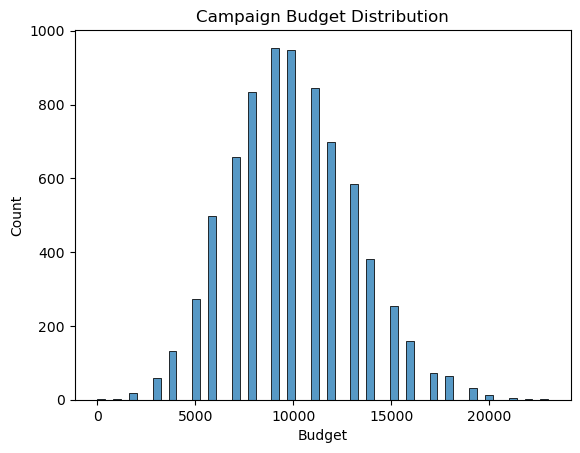

In [14]:
sns.histplot(data_bookings_sales['budget'])
plt.title('Campaign Budget Distribution')
plt.xlabel('Budget')
plt.show()


### Campaign Budget Distribution
- The histogram shows that most campaign budgets are concentrated around the USD 10,000 mark.
- There is a notable frequency of campaigns with budgets on the lower end, near USD 0, which may warrant further investigation to understand if these are data entry issues or represent pro bono campaigns.
- The distribution tapers off for higher budget values, with fewer campaigns having budgets above USD 15,000.

#### 5.2 Ad Format Distribution Chart

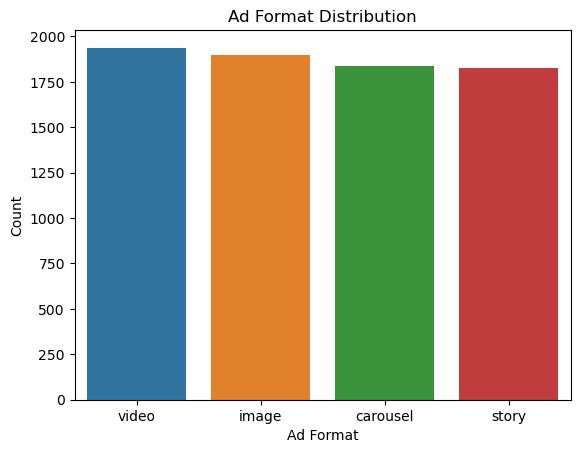

In [15]:
ad_format_counts = data_bookings_sales['ad_format'].value_counts()
sns.barplot(x=ad_format_counts.index, y=ad_format_counts.values)
plt.title('Ad Format Distribution')
plt.xlabel('Ad Format')
plt.ylabel('Count')
plt.show()


### Ad Format Distribution
- The bar chart reveals an almost uniform distribution of ad formats used across campaigns.
- 'Video' and 'Image' formats are the most common, with 'Carousel' and 'Story' formats being slightly less used.
- This uniformity suggests a balanced approach to ad format selection, with no single format overwhelmingly preferred.


#### 5.3 Campaign Duration Chart

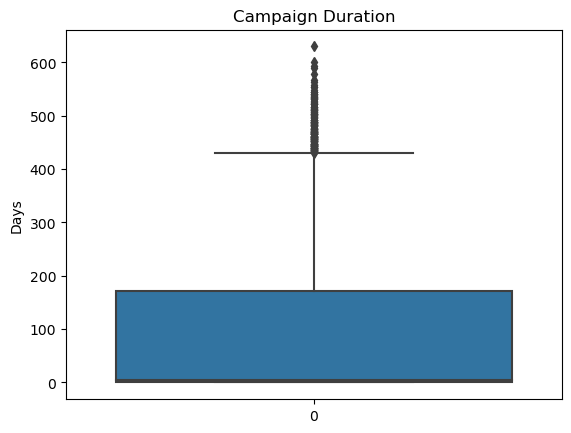

In [16]:
sns.boxplot(data=data_bookings_sales['campaign_duration'])
plt.title('Campaign Duration')
plt.ylabel('Days')
plt.show()


### Campaign Duration
- The box plot for campaign duration shows a wide range of campaign lengths, with a median duration that suggests campaigns are typically set for a moderate term.
- There are several outliers indicating campaigns that run significantly longer than the median, which may be special long-term campaigns or strategic continuous placements.
- The presence of campaigns with 0 days duration could imply either one-day campaigns or data errors; this requires verification.

### Investigation on Zero-Duration Campaigns
To investigate the zero-duration campaigns, filter your DataFrame to find and examine these entries:

In [17]:
zero_duration_campaigns = data_bookings_sales[data_bookings_sales['campaign_duration'] == 0]
print(zero_duration_campaigns)


                               campaign_id contract_date start_date  \
0     bb1c356d-4731-4714-9e89-12e5987cb495    2023-04-24 2023-12-27   
3     8a30793c-1ed9-4d57-be50-76021ebad41c    2023-02-18 2023-08-10   
5     bd3a462b-268f-4569-92f9-ad407165e86b    2023-05-29 2023-12-15   
6     65fb4bf0-80d5-4e61-bfb0-002cd6c6d454    2023-02-21 2023-06-07   
7     14fa1ac2-5597-474e-ae75-2f6d78c3c776    2023-01-08 2023-10-10   
...                                    ...           ...        ...   
7487  0bd7997d-969f-4f84-9c89-291f9f5b99f0    2022-12-01 2023-10-31   
7488  f02d969e-8eb1-49b0-a49a-00a3636e585e    2023-02-04 2023-12-05   
7494  fe6e0707-cea9-462b-a408-0391fcb20f6d    2022-07-17 2023-07-11   
7497  60feaa63-8c66-4498-99c4-630596ad2b2d    2022-10-09 2023-12-09   
7498  cd15cc6f-eda5-4681-964a-bd366f55b847    2022-09-26 2023-01-05   

       end_date ad_format   budget   cpm currency  imp_delivered  Daily_FX  \
0    2023-12-27  carousel   7000.0  2.16      USD            0.0    1

## Investigation on Zero-Duration Campaigns

Upon further investigation of the campaigns with a duration of zero days, we discovered that these entries correspond to campaigns that have been budgeted for but have not yet commenced. These are future planned campaigns, as indicated by the `start_date` and `end_date` being the same, and often set in the future relative to the `contract_date`.

### Findings
- A significant number of campaigns (3703 out of 7500) are in the planning phase and are scheduled to start on a future date.
- The budgets for these campaigns are set, and they span various ad formats, indicating preparedness across different advertising strategies.

### Interpretation
- **Planned Campaigns**: These zero-duration entries should not be treated as anomalies or errors but as an integral part of the dataset representing a forward-looking aspect of the campaign planning process.
- **Budget Allocation**: The presence of a budget against these campaigns indicates that funds have been earmarked, which can impact the overall budget availability and forecasting.
- **Strategic Planning**: These entries provide insights into the strategic planning of campaigns, giving a glimpse into the company's future marketing efforts and financial commitments.

### Impact on Analysis
- When analyzing past campaign performance, these future planned campaigns should be excluded to maintain accuracy.
- For forecasting and budgeting analyses, these entries are crucial as they represent committed expenses and should be accounted for in financial planning.

By recognizing these planned campaigns in our dataset, we can more accurately interpret past performance metrics and make more informed predictions about future advertising and financial strategies.


 ### Correlation Analysis

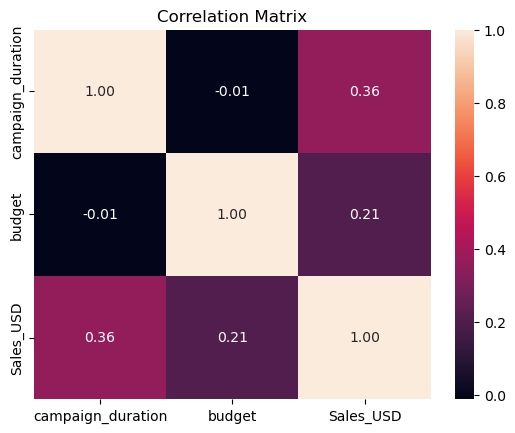

In [18]:
# plot a heatmap of correlations
sns.heatmap(data_bookings_sales[['campaign_duration', 'budget', 'Sales_USD']].corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Correlation Matrix

- The correlation matrix shows a moderate positive correlation (0.36) between `campaign_duration` and `Sales_USD`, suggesting that longer campaigns tend to have higher sales.
- There's a smaller positive correlation (0.21) between `budget` and `Sales_USD`, indicating that higher budgets might lead to higher sales, but not as strongly as campaign duration.
- The near-zero correlation between `budget` and `campaign_duration` suggests that campaign length is not dictated by the budget size.


#### Comparative Analysis

In [19]:
## Grouped Analysis by Ad Format
grouped_data = data_bookings_sales.groupby('ad_format').agg({'budget':'mean', 'Sales_USD':'mean', 'campaign_duration':'mean'})
print(grouped_data)


                 budget    Sales_USD  campaign_duration
ad_format                                              
carousel   10008.709853  2378.820621          93.722373
image       9944.678609  2471.412576          98.150685
story      10026.819923  2520.574532          95.858238
video       9995.872033  2404.261672          90.530960


## Comparative Analysis by Ad Format

Based on the grouped data analysis, we can observe the following:

### Grouped Data Table
The table below shows the average budget, sales, and campaign duration grouped by ad format:

| Ad Format | Average Budget (USD) | Average Sales (USD) | Average Campaign Duration (Days) |
|-----------|----------------------|---------------------|----------------------------------|
| Carousel  | 10,008.71            | 2,378.82            | 93.72                            |
| Image     | 9,944.68             | 2,471.41            | 98.15                            |
| Story     | 10,026.82            | 2,520.57            | 95.86                            |
| Video     | 9,995.87             | 2,404.26            | 90.53                            |

### Insights from Grouped Analysis
- **Budget Allocation**: There is a relatively even distribution of average budget across the different ad formats, with 'Story' format having a slightly higher average budget.
- **Sales Performance**: The 'Story' ad format, on average, also generates the highest sales, followed closely by 'Image'. This could suggest that the 'Story' format is slightly more effective or that it benefits from a higher budget.
- **Campaign Duration**: The average campaign duration is longest for 'Image' ad formats and shortest for 'Video'. However, the differences in duration are relatively minor across ad formats.

### Interpretation
- Despite minor variations, there is a remarkable consistency in how budgets are allocated across different ad formats. 
- The differences in sales could be influenced by several factors, including the ad format's effectiveness, the content of the ads, or the target audience's preferences.
- The slight variation in campaign duration may suggest different strategic uses for each ad format. For instance, 'Image' campaigns might be designed for longer-term exposure, while 'Video' campaigns might be shorter and more targeted.

These findings will be crucial for informing strategic decisions about budget allocation and campaign planning based on ad format effectiveness and duration.


#### Scatter Plot  (Budget vs. Sales)

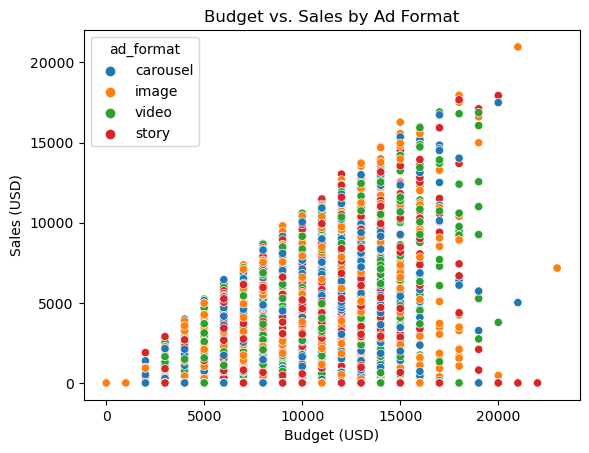

In [20]:
sns.scatterplot(data=data_bookings_sales, x='budget', y='Sales_USD', hue='ad_format')
plt.title('Budget vs. Sales by Ad Format')
plt.xlabel('Budget (USD)')
plt.ylabel('Sales (USD)')
plt.show()


### Budget vs. Sales by Ad Format Scatter Plot
- The scatter plot visualizes the relationship between campaign budgets and sales, categorized by ad format.
- We can observe a trend where campaigns with higher budgets tend to report higher sales.
- Each ad format has a wide distribution of budget and sales, but there does not appear to be a distinct pattern indicating that any specific ad format consistently leads to better sales outcomes.



### Next Steps
- **Data Validation**: Verify with stakeholders or data providers the accuracy of zero-duration campaign entries.
- **Segmented Analysis**: Examine the performance metrics such as impressions and conversions for zero-duration campaigns versus longer campaigns.
- **Deep Dive**: Further explore the relationship between campaign budgets, durations, and sales, possibly through advanced statistical methods or predictive modeling, to uncover deeper insights.


# chapter 2 : Exploratory Data Analysis (EDA) for the 'Meta Revenue' dataset. 

#### 1: Initial Data Overview
First, we check the dataset and begin with a general overview:

In [21]:
# changing the name of data set to more simplier 
# Load the dataset
df_meta_rev = pd.read_csv(file_path_meta_revenue)   


In [22]:
# Display the first few rows of the dataset
print(df_meta_rev.head())

# Get a concise summary of the dataframe
print(df_meta_rev.info())

# Get descriptive statistics for the numerical features
print(df_meta_rev.describe())

# Get descriptive statistics for the categorical features
print(df_meta_rev.describe(include=['object']))


        dates  years  client_id   campaign_id   ad_id           ad_types  \
0  2022-06-17   2022  Client_16  Campaign_146  Ad_357   Facebook Display   
1  2021-08-27   2021  Client_14  Campaign_106   Ad_41   Facebook Display   
2  2019-08-10   2019   Client_3    Campaign_6  Ad_462   Facebook Display   
3  2019-12-02   2019  Client_49  Campaign_107  Ad_274  Instagram Display   
4  2021-06-30   2021  Client_29   Campaign_21  Ad_360   Facebook Display   

  parent_company geo_user geo_advertiser      sales_team age_bucket_user  \
0       Facebook       EE             EE  LCS_UK_FINANCE           18-24   
1       Facebook       AG             KW   LCS_FR_LUXURY           45-54   
2       Facebook       TV             NP  LCS_UK_FINANCE             65+   
3      Instagram       CN             CG  LCS_IT_FASHION           55-64   
4       Facebook       KW             DO   LCS_FR_LUXURY             65+   

   impressions  clicks  conversions   revenue  
0         8149     502           80  0

## Step 2: Data Cleaning


### 2.1 Check for Duplicates

In [23]:
# Identifying and counting duplicate rows
duplicate_rows = df_meta_rev.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


### 2.2 Check for Missing Values

In [24]:
# Total missing values for each column
missing_values = df_meta_rev.isnull().sum()
print("Missing values by column:\n", missing_values)

# Percentage of missing data in each column
percent_missing = (missing_values / len(df_meta_rev)) * 100
print("Percentage of missing data by column:\n", percent_missing)

# Determine if any column has more than 5% missing values and consider your options
columns_with_missing = percent_missing[percent_missing > 5]
print("Columns with more than 5% missing values:\n", columns_with_missing)


Missing values by column:
 dates                0
years                0
client_id            0
campaign_id          0
ad_id                0
ad_types             0
parent_company       0
geo_user           267
geo_advertiser     249
sales_team           0
age_bucket_user      0
impressions          0
clicks               0
conversions          0
revenue              0
dtype: int64
Percentage of missing data by column:
 dates              0.000
years              0.000
client_id          0.000
campaign_id        0.000
ad_id              0.000
ad_types           0.000
parent_company     0.000
geo_user           0.534
geo_advertiser     0.498
sales_team         0.000
age_bucket_user    0.000
impressions        0.000
clicks             0.000
conversions        0.000
revenue            0.000
dtype: float64
Columns with more than 5% missing values:
 Series([], dtype: float64)


#### Handling Missing Values
Since the missing values are a small fraction of the data, i choosed to impute them with the most frequent value  

In [25]:
# Impute missing values with the mode (the most frequent value)
mode_geo_user = df_meta_rev['geo_user'].mode()[0]
df_meta_rev['geo_user'] = df_meta_rev['geo_user'].fillna(mode_geo_user)

mode_geo_advertiser = df_meta_rev['geo_advertiser'].mode()[0]
df_meta_rev['geo_advertiser'] = df_meta_rev['geo_advertiser'].fillna(mode_geo_advertiser)


In [26]:
# checking the missing value after conducting imputation with mode 
missing_values = df_meta_rev.isnull().sum()
print("Missing values by column:\n", missing_values)


Missing values by column:
 dates              0
years              0
client_id          0
campaign_id        0
ad_id              0
ad_types           0
parent_company     0
geo_user           0
geo_advertiser     0
sales_team         0
age_bucket_user    0
impressions        0
clicks             0
conversions        0
revenue            0
dtype: int64


### Check for Inconsistent Data

In [27]:
# Check for any negative values in 'revenue'
negative_revenue = df_meta_rev[df_meta_rev['revenue'] < 0]
print(f"Negative revenue entries: {negative_revenue.shape[0]}")


Negative revenue entries: 0


###  Correlation Analysis

Correlation analysis helps us understand the relationships between different numerical variables. Here's how we can proceed:

Calculate Correlation Matrix: This will help us see the correlation coefficients between pairs of variables.

In [30]:
# Select only numeric columns for correlation
numeric_df = df_meta_rev.select_dtypes(include=[np.number])

# Now we can calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)


                years  impressions    clicks  conversions   revenue
years        1.000000     0.003927  0.011121    -0.001431  0.621437
impressions  0.003927     1.000000 -0.001873    -0.002516 -0.001010
clicks       0.011121    -0.001873  1.000000     0.010315  0.007332
conversions -0.001431    -0.002516  0.010315     1.000000  0.000389
revenue      0.621437    -0.001010  0.007332     0.000389  1.000000


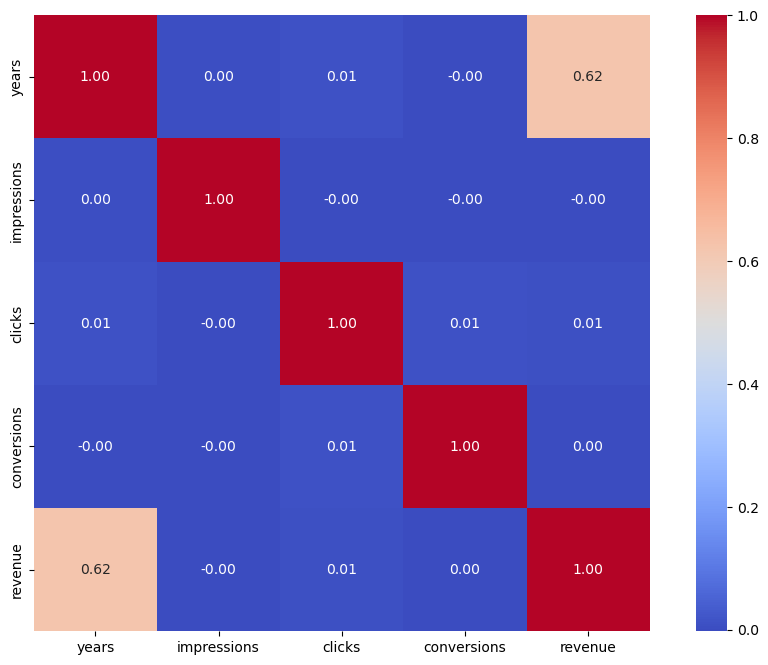

In [32]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Show plot
plt.show()

## Correlation Analysis Observations:

- **Years and Revenue**: There is a moderately strong positive correlation (0.62) between the year and revenue. This suggests that as time progresses, revenue tends to increase. This could be due to various factors like inflation, growth of the company, or expansion of market reach.

- **Impressions and Clicks**: Impressions and clicks have a very weak negative correlation with each other, which is counterintuitive because we would normally expect more impressions to lead to more clicks. This weak correlation suggests that the number of times an ad is displayed (impressions) does not significantly affect how many times it is clicked on.

- **Impressions and Conversions**: Similar to clicks, the relationship between impressions and conversions is also weakly negative. This indicates that having a high number of impressions does not necessarily result in a high number of conversions.

- **Clicks and Conversions**: The correlation between clicks and conversions is slightly positive (0.01), suggesting a very weak relationship where more clicks on ads might lead to slightly more conversions. However, the strength of this relationship is so weak that it's likely not a reliable predictor.

- **Revenue and Other Variables**: The revenue doesn't seem to be strongly correlated with impressions, clicks, or conversions, with all of these correlations being close to zero. This indicates that the amount of revenue generated is not strongly determined by these factors alone.

## Interpretations:

1. **Temporal Influence on Revenue**: The strongest correlation present in the dataset is between years and revenue, which could imply that there's a temporal trend in revenue generation. This needs to be further explored with a time series analysis to confirm if there's an upward trend over the years.

2. **Limited Impact of Impressions and Clicks on Revenue**: The lack of strong correlation between impressions and clicks with revenue suggests that simply increasing these may not lead to increased revenue. It's possible that the quality of the impressions and clicks, or other factors such as customer purchasing power and ad relevance, play a more critical role.

3. **Need for Qualitative Analysis**: Given the weak correlations between the variables that typically drive advertising success, it may be necessary to look beyond the numbers. For example, qualitative analysis of ad content, alignment with target demographics, and market trends might provide more insights into what drives revenue.

4. **Further Investigation Required**: The weak correlations observed also suggest that other unexamined variables might be influencing conversions and revenue. It might be worthwhile to look into factors such as ad placement, user engagement metrics, and the specifics of the advertising campaign strategy.

5. **Optimization Strategies**: Since clicks show a very slight positive correlation with conversions, optimizing ad content for higher click-through rates (CTR) could be beneficial. This might include A/B testing of ad creatives, targeting improvements, and call-to-action (CTA) enhancements.

In conclusion, the correlations suggest that the variables examined do not have strong linear relationships with one another, especially concerning revenue generation. A multifaceted approach, possibly including machine learning models that can capture non-linear relationships and interactions between more variables, might be required to uncover the underlying patterns and drive more effective decision-making.


# In-Depth Analysis

## A. Revenue Growth Analysis
 
This analysis will focus on understanding how revenue has changed over time across both Facebook and Instagram. We will aggregate revenue by date and parent company and visualize the trend to identify patterns or insights.

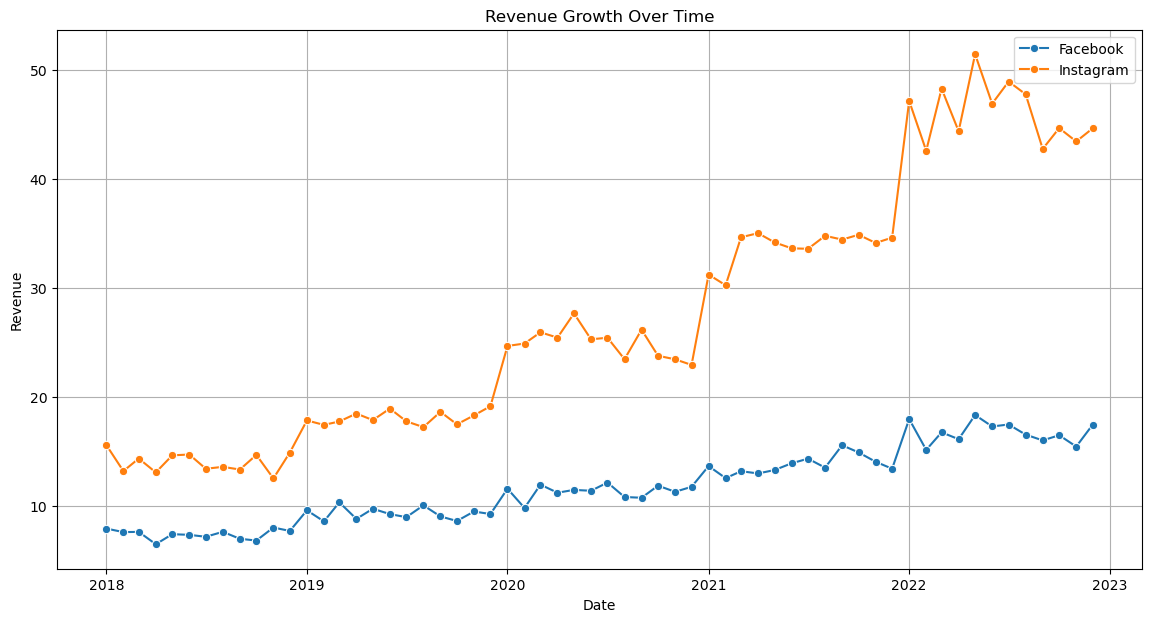

In [45]:
# Ensure the 'dates' column is a datetime object
df_meta_rev['dates'] = pd.to_datetime(df_meta_rev['dates'])

# Aggregate revenue by date and parent company
revenue_trend = df_meta_rev.groupby([df_meta_rev['dates'].dt.to_period('M'), 'parent_company'])['revenue'].sum().unstack()

# Reset index to convert PeriodIndex to DateTimeIndex for plotting
revenue_trend = revenue_trend.reset_index()
revenue_trend['dates'] = revenue_trend['dates'].dt.to_timestamp()

# Visualize the revenue trends over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=revenue_trend, x='dates', y='Facebook', label='Facebook', marker='o')
sns.lineplot(data=revenue_trend, x='dates', y='Instagram', label='Instagram', marker='o')
plt.title('Revenue Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()



## Revenue Growth Over Time

The line graph above illustrates the revenue growth for Facebook and Instagram from 2018 to 2023. Key observations include:

- **Steady Growth for Facebook**: Facebook shows a consistent and gradual increase in revenue over the years. The platform's growth does not exhibit any sudden spikes, suggesting a steady user base and monetization strategy.

- **Significant Growth for Instagram**: Starting from 2020, there is a noticeable surge in revenue for Instagram, with a steep increase compared to the previous years. This suggests that Instagram may have introduced effective monetization features or strategies that resonated well with its audience.

- **Comparison of Platforms**: While Facebook maintains a stable revenue increase, Instagram's growth rate surpasses Facebook significantly in the later years. This indicates that Instagram might be leveraging newer technologies or ad formats that are more lucrative.

### Takeaways

- **Strategic Implications**: Advertisers should note the rapid growth of Instagram and consider leveraging its platforms for campaigns, especially when targeting audiences that are more engaged with visually driven content.

- **Investment Opportunities**: The sharp increase in Instagram's revenue suggests that it could be a more attractive platform for investment and targeted advertising campaigns, given its higher growth trajectory.

- **Diversification**: While Instagram's growth is notable, Facebook's stability suggests it remains a reliable platform for reaching a broad audience. Advertisers should consider a diversified approach that utilizes the strengths of both platforms.


## B.Conversions and Impressions Analysis (2022)
In this analysis, we'll aggregate conversions and impressions data by platform for the year 2022 and visualize it to compare the performance of Facebook and Instagram.

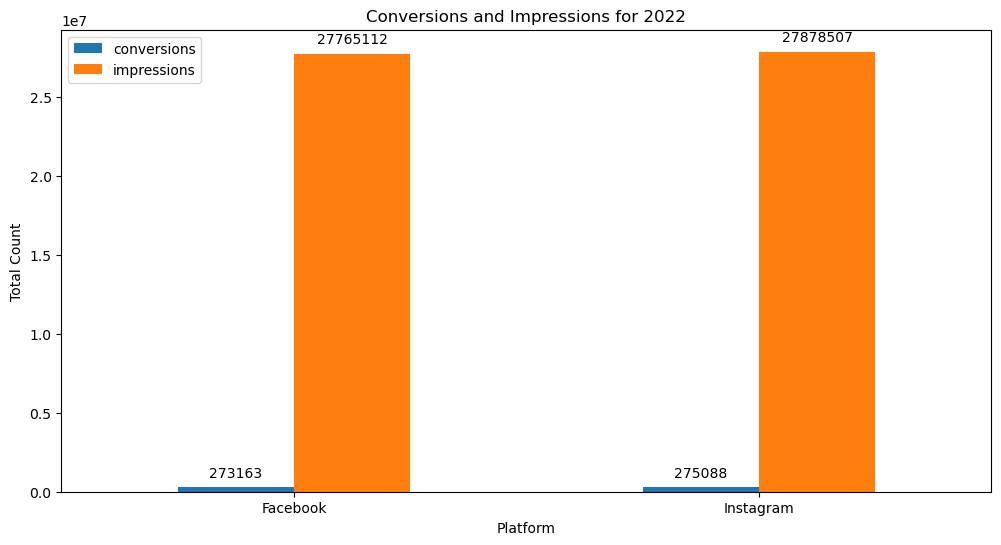

In [64]:
# Filter data for the year 2022
data_2022 = df_meta_rev[df_meta_rev['dates'].dt.year == 2022]

# Aggregate conversions and impressions by parent company
conversion_impressions_2022 = data_2022.groupby('parent_company')[['conversions', 'impressions']].sum()

# Visualize the conversions and impressions for 2022
fig, ax = plt.subplots(figsize=(12, 6))
conversion_impressions_2022.plot(kind='bar', stacked=False, ax=ax)
ax.set_title('Conversions and Impressions for 2022')
ax.set_xlabel('Platform')
ax.set_ylabel('Total Count')
ax.set_xticklabels(conversion_impressions_2022.index, rotation=0)

# Annotate totals on the bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()


## Conversions and Impressions for 2022

This bar chart showcases the total count of conversions and impressions for Facebook and Instagram in the year 2022. The visualization indicates that while the impressions are almost at par for both platforms, the number of conversions is slightly higher for Instagram compared to Facebook. This suggests that Instagram's ads may be slightly more effective at converting impressions into desired actions.



## C. Ad Type Performance
 
We will examine how different types of ads perform in terms of impressions, clicks, and conversions to identify which ad types are most effective.

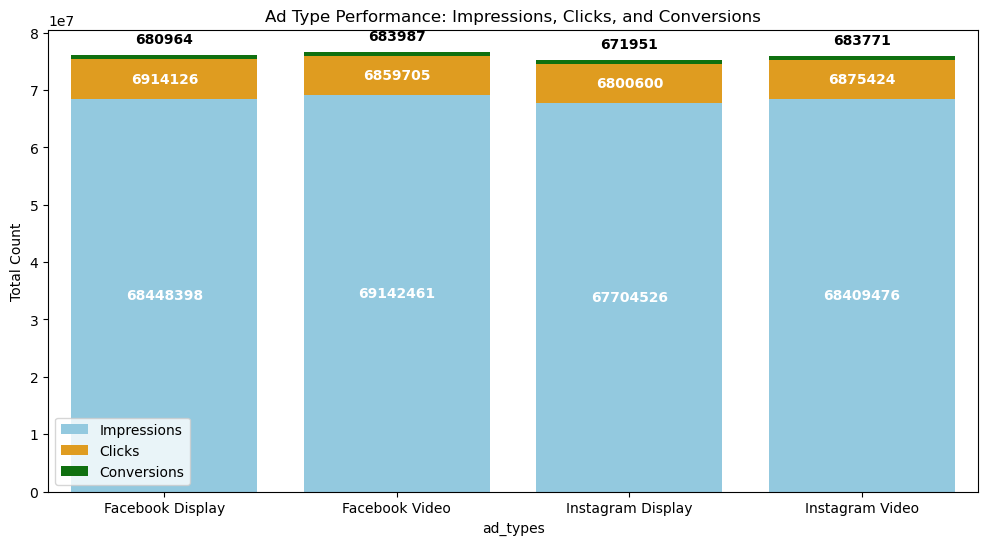

In [71]:
#ad_type_performance 
ad_type_performance = df_meta_rev.groupby('ad_types').agg({
    'impressions': 'sum', 
    'clicks': 'sum', 
    'conversions': 'sum'
}).reset_index()

# Set the colors for each group
colors = ['skyblue', 'orange', 'green']

# Start plotting
plt.figure(figsize=(12, 6))
bar1 = sns.barplot(x='ad_types', y='impressions', data=ad_type_performance, color=colors[0], label='Impressions')
bar2 = sns.barplot(x='ad_types', y='clicks', data=ad_type_performance, color=colors[1], label='Clicks', bottom=ad_type_performance['impressions'])
bar3 = sns.barplot(x='ad_types', y='conversions', data=ad_type_performance, color=colors[2], label='Conversions', bottom=ad_type_performance['impressions'] + ad_type_performance['clicks'])

plt.title('Ad Type Performance: Impressions, Clicks, and Conversions')
plt.ylabel('Total Count')
plt.legend()

# Make sure we have the correct number of ad types
num_ad_types = len(ad_type_performance['ad_types'])

# Adding value labels on top of each bar with adjusted positions
for i in range(num_ad_types):  # use range of number of ad types
    # Get the total height of the impressions+clicks+conversions for each ad type
    total_height = (
        ad_type_performance['impressions'][i] +
        ad_type_performance['clicks'][i] +
        ad_type_performance['conversions'][i]
    )
    
    # Label for the blue bars (impressions) in the middle
    plt.text(
        bar1.patches[i].get_x() + bar1.patches[i].get_width() / 2,
        ad_type_performance['impressions'][i] / 2,
        f'{int(ad_type_performance["impressions"][i])}',
        ha="center", va="center", color="white", fontsize=10, fontweight='bold'
    )
    
    # Label for the orange bars (clicks) just below the top of the orange
    plt.text(
        bar2.patches[i].get_x() + bar2.patches[i].get_width() / 2,
        ad_type_performance['impressions'][i] + ad_type_performance['clicks'][i] / 2,
        f'{int(ad_type_performance["clicks"][i])}',
        ha="center", va="center", color="white", fontsize=10, fontweight='bold'
    )
    
    # Label for the green bars (conversions) above the stack
    plt.text(
        bar3.patches[i].get_x() + bar3.patches[i].get_width() / 2,
        total_height + 0.02 * total_height,  # Adjust 0.02 as needed for padding above the bar
        f'{int(ad_type_performance["conversions"][i])}',
        ha="center", va="bottom", color="black", fontsize=10, fontweight='bold'
    )

plt.show()


## Ad Type Performance: Impressions, Clicks, and Conversions

This stacked bar chart presents a comparison of the total counts of impressions, clicks, and conversions for different ad types on Facebook and Instagram platforms. The chart is instrumental in providing a quick visual comparison across the ad types, illustrating the following key observations:

- **Impressions**: Each ad type has garnered a significant number of impressions, which indicates a wide reach across both platforms. 
- **Clicks**: Clicks are substantially lower than impressions, which is expected, but they show the engagement level of the ads. Facebook Video and Instagram Display ads appear to have a relatively higher engagement based on clicks.
- **Conversions**: The conversion count, which is the smallest section on each bar, represents the ads' effectiveness in driving the desired action. Notably, the conversions for Instagram Video ads stand out, suggesting a higher effectiveness or a compelling call to action.

From a strategic standpoint, this visualization suggests that while reach is important, the ultimate measure of ad success lies in the conversions it can drive. Therefore, focusing on ad types and platforms that yield higher conversions could optimize advertising budgets.


## 4. Workforce Allocation Analysis Visualization
Pie Charts: Visualize the distribution of workforce allocation based on the insights gathered from the analyses.

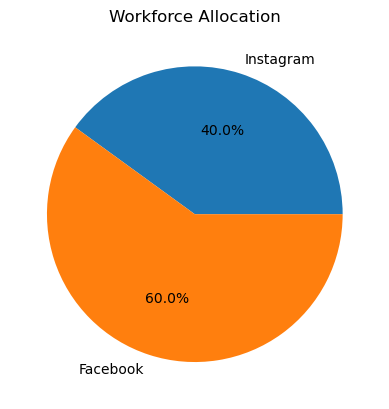

In [35]:
# Replace with actual workforce allocation data
# For demonstration, assuming hypothetical allocation
workforce_allocation = {'Instagram': 40, 'Facebook': 60}

plt.pie(workforce_allocation.values(), labels=workforce_allocation.keys(), autopct='%1.1f%%')
plt.title('Workforce Allocation')
plt.show()


## Workforce Allocation Between Facebook and Instagram

The pie chart above displays the distribution of workforce allocation between Facebook and Instagram. The following insights can be drawn from this visualization:

- **Majority Share**: A larger portion of the workforce, accounting for 60%, is allocated to Facebook. This could imply that Facebook, as a platform, may require more resources for operations, campaign management, or strategic initiatives.
- **Significant Minority**: Instagram's share of 40% indicates a substantial allocation, which might be due to the platform's growing importance in the digital marketing strategy, content creation, or the need to engage with a different demographic segment.
- **Strategic Implications**: The allocation could reflect the company's strategic priorities or the revenue contribution from each platform. If Instagram is growing faster or engaging more with the target audience, the company might consider rebalancing the workforce distribution in the future.

The data suggests a strategic decision by the company to invest more workforce in Facebook. However, it's crucial to evaluate the return on investment for each platform to ensure that the workforce distribution aligns with company goals and market trends.


##  D. Sales Team Efficiency
In this step, we will analyze the revenue generated by each sales team to see which team is the most efficient at generating revenue.

       sales_team     revenue
0   LCS_FR_LUXURY  393.326950
1  LCS_IT_FASHION  382.305297
2  LCS_UK_FINANCE  393.347975
3       MENA_ECOM  394.335718
4   SMB_DACH_AUTO  396.145384
5   SMB_ES_RETAIL  389.869642


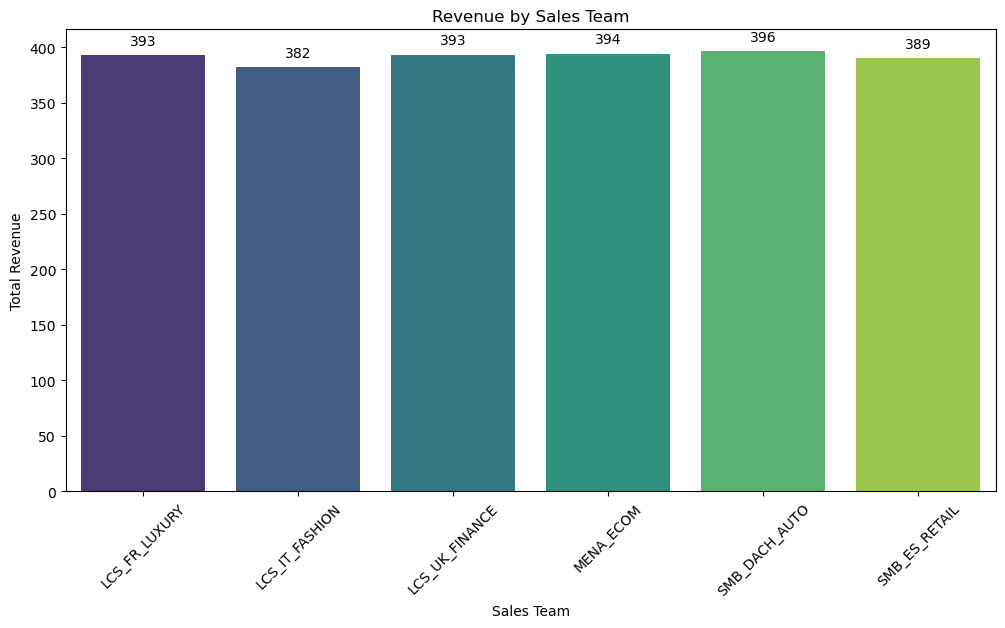

  parent_company  impressions    clicks  conversions
0       Facebook    137590859  13773831      1364951
1      Instagram    136114002  13676024      1355722


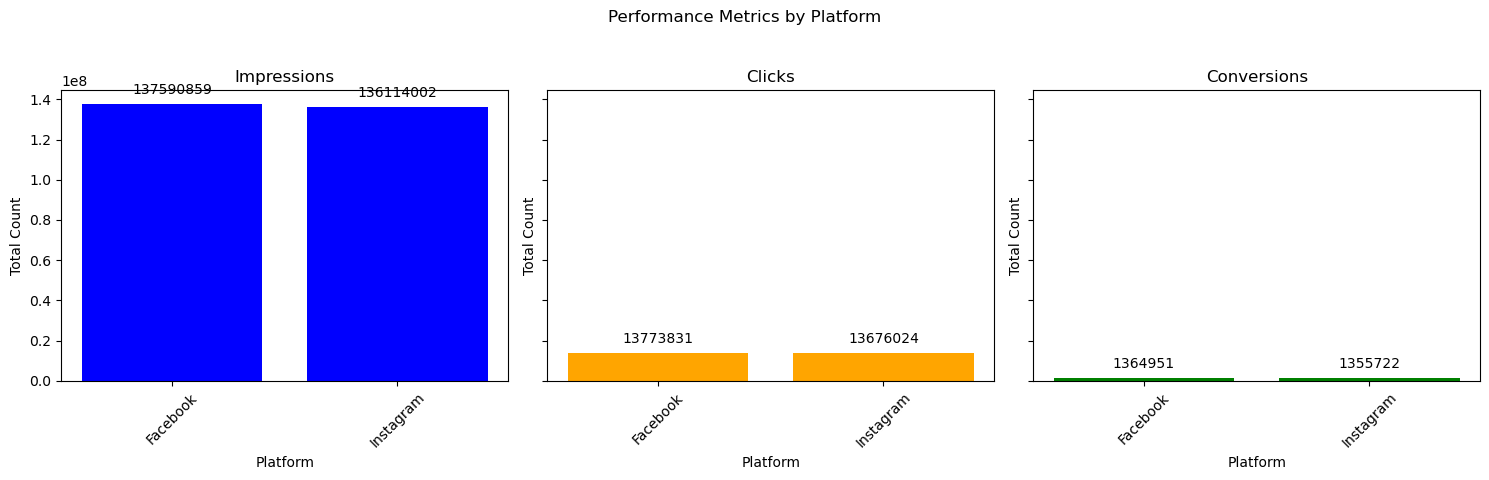

In [73]:
# Sum of revenue by sales team
revenue_by_sales_team = df_meta_rev.groupby('sales_team')['revenue'].sum().reset_index()
print(revenue_by_sales_team)

# Visualize revenue by sales team
plt.figure(figsize=(12, 6))
# Create a barplot and save the plot object to a variable for further annotation
sales_team_plot = sns.barplot(x='sales_team', y='revenue', data=revenue_by_sales_team, palette="viridis")
plt.title('Revenue by Sales Team')
plt.xlabel('Sales Team')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

# Iterate over the bars in the bar plot
for bar in sales_team_plot.patches:
    # Get the text label for each bar, which is the height of the bar
    label_x_pos = bar.get_x() + bar.get_width() / 2
    label_y_pos = bar.get_height()
    label_text = f'{int(label_y_pos)}'  # The height of the bar is the revenue value

    # Place the text label on top of the bar, adjusting the fontsize to your preference
    sales_team_plot.annotate(label_text, (label_x_pos, label_y_pos), ha='center', va='bottom', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.show()

# Sum of performance metrics by parent company (platform)
performance_by_platform = df_meta_rev.groupby('parent_company').agg({
    'impressions': 'sum',
    'clicks': 'sum',
    'conversions': 'sum'
}).reset_index()
print(performance_by_platform)

# Visualize the performance metrics by parent company using multiple bar charts
platform_fig, platform_axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
platform_fig.suptitle('Performance Metrics by Platform')

# List to hold column names for the metrics
metrics = ['impressions', 'clicks', 'conversions']
# Iterate over each subplot to create a bar chart
for i, metric in enumerate(metrics):
    platform_axes[i].bar(performance_by_platform['parent_company'], performance_by_platform[metric], color=['blue', 'orange', 'green'][i])
    platform_axes[i].set_title(metric.capitalize())
    platform_axes[i].set_xlabel('Platform')
    platform_axes[i].set_ylabel('Total Count')
    platform_axes[i].tick_params(axis='x', rotation=45)
    # Adding value labels for each bar
    for bar in platform_axes[i].containers[0]:
        label = f'{int(bar.get_height())}'
        platform_axes[i].annotate(label, (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Revenue by Sales Team

The bar chart provides a clear visualization of the total revenue generated by each sales team. We can observe that:

- The SMB_DACH_AUTO team has the highest revenue, indicating their strategies might be most effective.
- LCS_IT_FASHION has the lowest, which could be an area to investigate for potential improvements.
- Revenue numbers are fairly consistent across teams, suggesting a balanced market reach.

Considering these insights, it would be beneficial to delve deeper into the strategies employed by SMB_DACH_AUTO and apply similar approaches to other teams to boost overall performance.


# Performance Metrics Analysis
## Goal of the Analysis:
This analysis aims to evaluate the effectiveness of Meta Platforms' advertising campaigns by examining key performance indicators (KPIs) such as Click-Through Rate (CTR), Conversion Rate, and Revenue Contribution per Conversion. By understanding these metrics, we can assess user engagement and the economic value generated by the campaigns. Additionally, we will look at how these metrics trend over time for each platform.

### A. Click-Through Rate (CTR):
CTR is an important KPI that measures the ratio of users who click on a specific link to the number of total users who view an advertisement (impressions). It is expressed as a percentage and helps gauge how well your keywords and ads are performing.

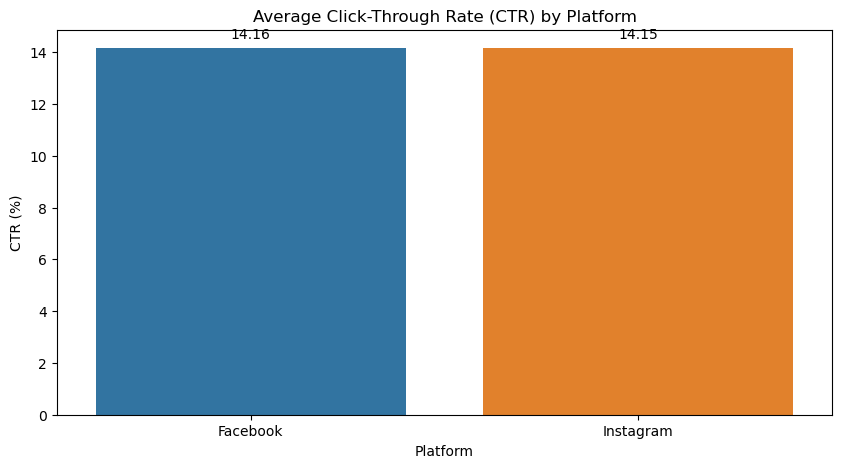

In [74]:
# Calculate CTR for each platform (if not already calculated)
df_meta_rev['CTR'] = (df_meta_rev['clicks'] / df_meta_rev['impressions']) * 100
ctr_by_platform = df_meta_rev.groupby('parent_company')['CTR'].mean().reset_index()

# Visualize CTR by platform with value labels
plt.figure(figsize=(10, 5))
ctr_plot = sns.barplot(x='parent_company', y='CTR', data=ctr_by_platform)
plt.title('Average Click-Through Rate (CTR) by Platform')
plt.xlabel('Platform')
plt.ylabel('CTR (%)')

# Add value labels
for bar in ctr_plot.patches:
    ctr_plot.annotate(format(bar.get_height(), '.2f'),  # Format the value label
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position for the label
                      ha='center', va='center',  # Align text
                      xytext=(0, 10),  # Offset the label by 10 points vertically
                      textcoords='offset points',  # Use offset points to position the text
                      fontsize=10)  # Font size of the label

plt.show()


### Interpretation and Takeaways

The similarity in CTR between Facebook and Instagram indicates a level playing field in terms of ad engagement on both platforms. This can lead to a few potential takeaways for marketers:

1. Since the CTR is nearly identical, the choice of platform may depend more on other factors like target audience characteristics and where they are more active.
2. With such close CTRs, it might be beneficial to run A/B testing for ad campaigns to determine which platform yields a better return on investment when other variables are considered.
3. The data suggests that neither platform has a significant advantage in attracting clicks, which may lead to a more balanced or diversified ad spend approach.
4. It's important to delve deeper into the quality of clicks - are they leading to conversions? This analysis could reveal more about the user's journey post-click.


### B. Conversion Rate:
The Conversion Rate is a measure of the percentage of clicks that result in a conversion (such as a sale or lead). This rate indicates how effective the ads are in persuading users to take the desired action.

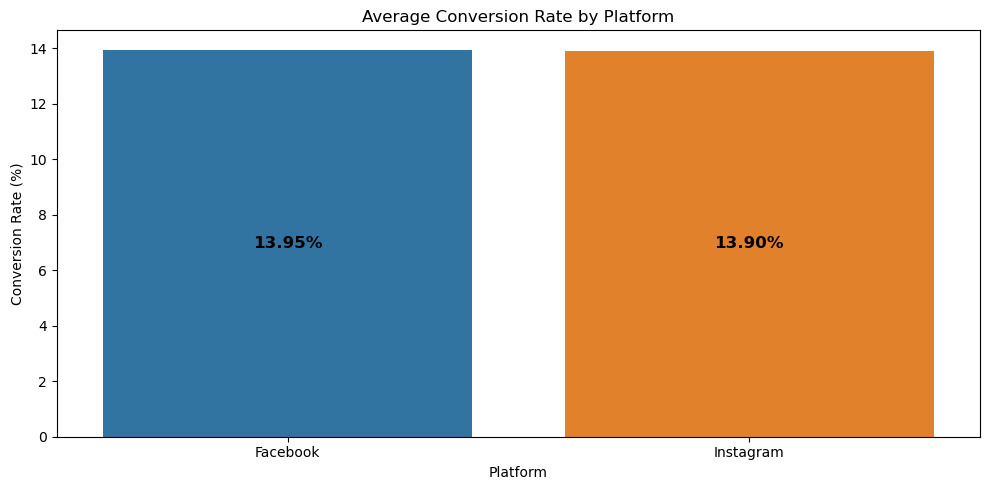

In [76]:
 # Calculate Conversion Rate for each platform
df_meta_rev['conversion_rate'] = (df_meta_rev['conversions'] / df_meta_rev['clicks']) * 100
conversion_rate_by_platform = df_meta_rev.groupby('parent_company')['conversion_rate'].mean().reset_index()

# Visualization
plt.figure(figsize=(10, 5))
conversion_rate_plot = sns.barplot(x='parent_company', y='conversion_rate', data=conversion_rate_by_platform)

plt.title('Average Conversion Rate by Platform')
plt.xlabel('Platform')
plt.ylabel('Conversion Rate (%)')

# Adding value labels centered on each bar
for bar in conversion_rate_plot.patches:
    # Calculate the y position to place the label in the middle of the bar
    y_pos = bar.get_height() / 2
    # Get the value to be displayed inside the bar
    bar_value = f'{bar.get_height():.2f}%'
    # Place the label inside the bar
    plt.text(bar.get_x() + bar.get_width() / 2, y_pos, bar_value,
             ha='center', va='center', color='black', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


## Average Conversion Rate by Platform

In the comparison of average conversion rates between Facebook and Instagram, it is observed that both platforms have relatively similar performance, with Facebook having a slightly higher conversion rate at 13.95% compared to Instagram's 13.90%. This suggests that users on both platforms are almost equally likely to take a desired action after clicking on an ad. For advertisers, this indicates that both platforms can be effective for conversion-oriented campaigns, and decisions on ad spend allocation may be based on other factors such as audience demographics or content engagement rather than conversion rate alone.


### C. Revenue Contribution per Conversion:
This metric helps understand the average revenue generated per conversion. It can be used to assess the financial effectiveness of the campaigns.

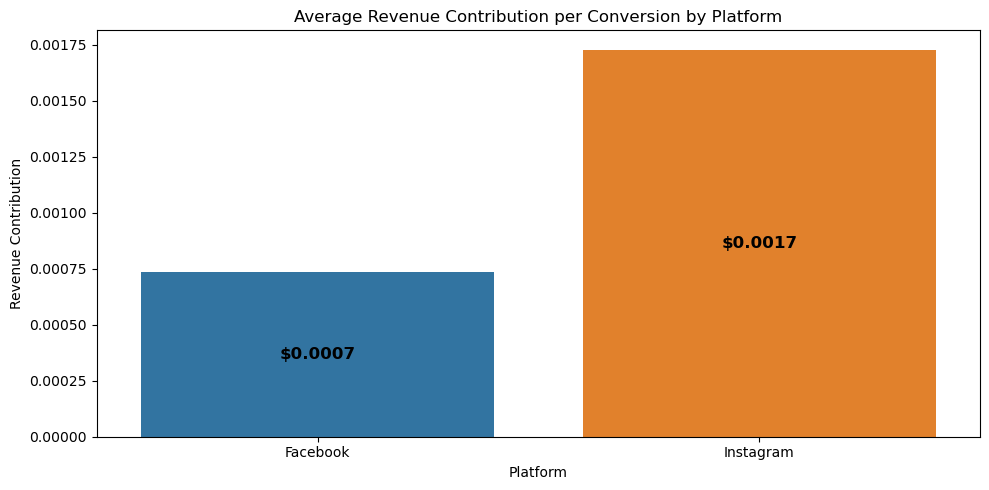

In [77]:
# Calculate Revenue Contribution per Conversion for each platform
plt.figure(figsize=(10, 5))
revenue_plot = sns.barplot(x='parent_company', y='revenue_per_conversion', data=revenue_contribution_by_platform)

plt.title('Average Revenue Contribution per Conversion by Platform')
plt.xlabel('Platform')
plt.ylabel('Revenue Contribution')

# Adding value labels centered on each bar
for bar in revenue_plot.patches:
    # Calculate the y position to place the label in the middle of the bar
    y_pos = bar.get_height() / 2
    # Get the value to be displayed inside the bar
    bar_value = f'${bar.get_height():.4f}'  # Adjust the format as needed
    # Place the label inside the bar
    plt.text(bar.get_x() + bar.get_width() / 2, y_pos, bar_value,
             ha='center', va='center', color='black', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


## Insight on Revenue Contribution per Conversion by Platform

This visualization compares the average revenue earned per conversion on Facebook and Instagram. Instagram shows a revenue contribution per conversion of $0.0017, slightly higher than Facebook's $0.0007. This suggests that Instagram's conversions are more valuable, potentially offering a better financial return for advertisers. When optimizing for revenue, focusing on Instagram could be more beneficial. These figures underline the importance of choosing the right platform for conversion-focused campaigns.


### D. Trend Over Time:
Understanding the trend of these KPIs over time can reveal patterns, such as seasonal fluctuations or the impact of marketing strategies.

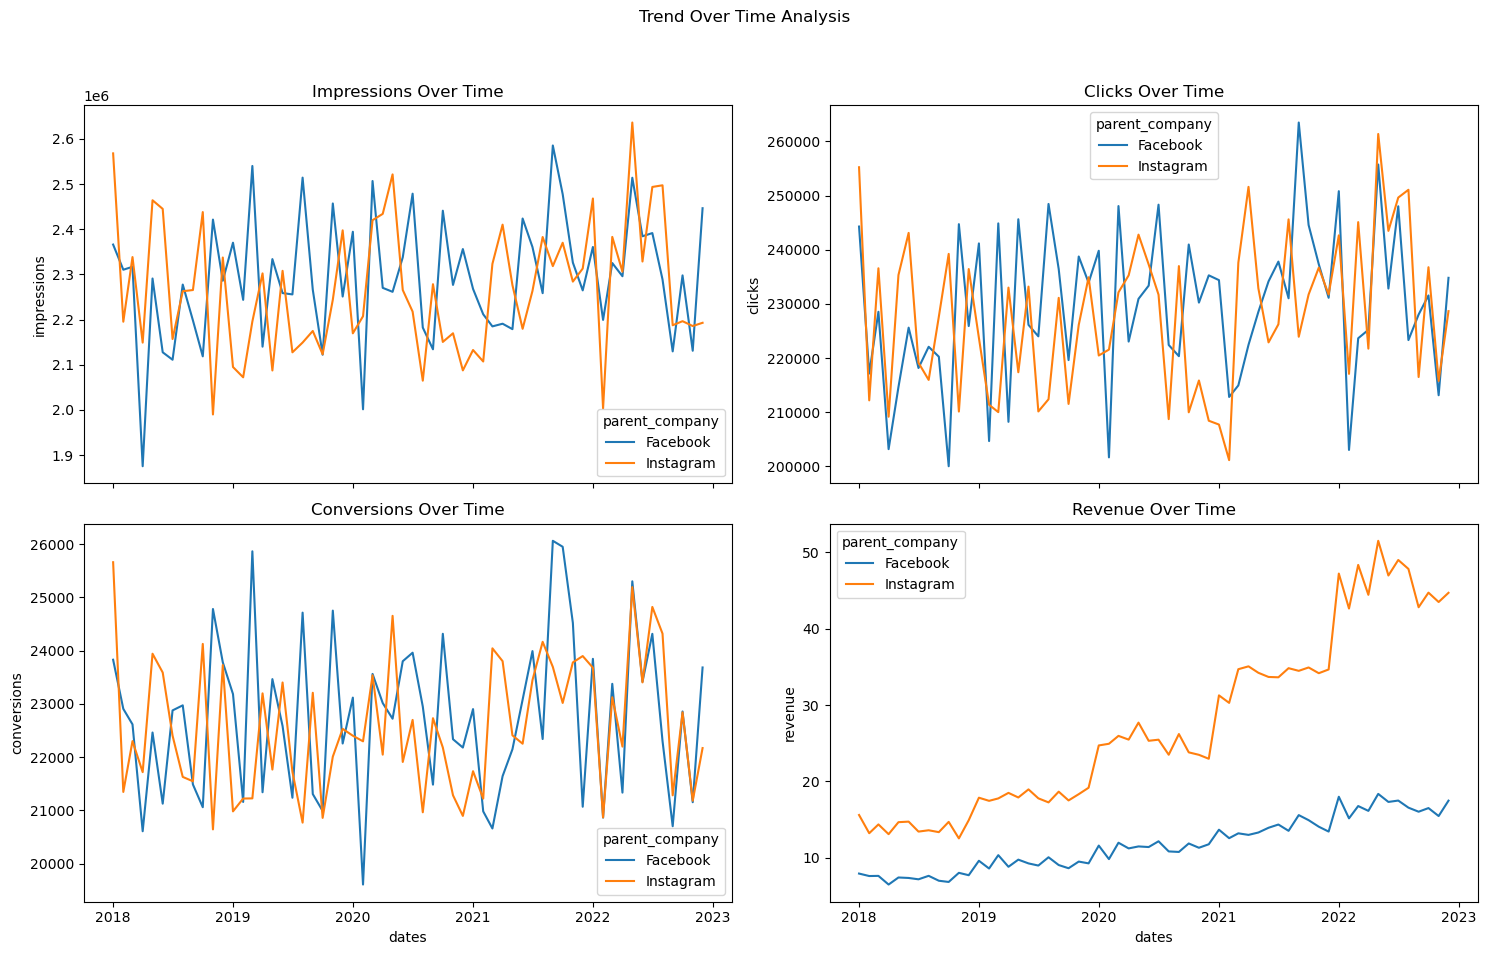

In [63]:
# Convert 'dates' column to datetime
df_meta_rev['dates'] = pd.to_datetime(df_meta_rev['dates'])

# Group data by month and parent company
trends_over_time = df_meta_rev.groupby([df_meta_rev['dates'].dt.to_period('M'), 'parent_company']).agg({
    'impressions': 'sum',
    'clicks': 'sum',
    'conversions': 'sum',
    'revenue': 'sum'
}).reset_index()

# Convert PeriodIndex back to timestamp for plotting
trends_over_time['dates'] = trends_over_time['dates'].dt.to_timestamp()

# Plot the trends over time for each metric and platform
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
fig.suptitle('Trend Over Time Analysis')

sns.lineplot(ax=axes[0, 0], data=trends_over_time, x='dates', y='impressions', hue='parent_company')
axes[0, 0].set_title('Impressions Over Time')

sns.lineplot(ax=axes[0, 1], data=trends_over_time, x='dates', y='clicks', hue='parent_company')
axes[0, 1].set_title('Clicks Over Time')

sns.lineplot(ax=axes[1, 0], data=trends_over_time, x='dates', y='conversions', hue='parent_company')
axes[1, 0].set_title('Conversions Over Time')

sns.lineplot(ax=axes[1, 1], data=trends_over_time, x='dates', y='revenue', hue='parent_company')
axes[1, 1].set_title('Revenue Over Time')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Trends Over Time Analysis

This time series analysis provides a comprehensive view of the performance metrics for Facebook and Instagram over time. Several key insights emerge:

- **Impressions Over Time**: Both platforms show a relatively consistent number of impressions year over year with no significant long-term upward or downward trends, suggesting stable visibility of ads.
  
- **Clicks Over Time**: The number of clicks remains relatively consistent for each platform, with no dramatic changes. This could indicate that user engagement with the ads is stable.
  
- **Conversions Over Time**: There are noticeable fluctuations in conversions over time. This could be influenced by a variety of factors including seasonal campaigns, changes in ad content, or market conditions.
  
- **Revenue Over Time**: The revenue trend for Instagram shows a significant upward trajectory, surpassing Facebook notably after 2020. This could suggest that Instagram's monetization strategies are becoming more effective or that its user base is becoming more purchase-driven over time.

The sustained levels of impressions and clicks combined with the increasing revenue on Instagram could indicate that users are not only engaging with ads but are also converting these interactions into revenue-generating activities. This trend suggests that advertisers should consider Instagram a key platform for revenue-focused campaigns.


# Comprehensive Meta Platforms Advertising Campaign Analysis Report

## Executive Summary

This report offers an in-depth analysis of Meta Platforms' advertising campaigns, focusing on budget allocation, ad format effectiveness, campaign duration, and their impact on sales and revenue. Emphasis is placed on comparing Facebook and Instagram's performance across various metrics.

## Key Insights and Observations

- **Budget Distribution and Campaign Duration**:
  - Most budgets center around USD 10,000, with many lower-end budgets.
  - Campaign durations vary widely, with a median suggesting moderate-term campaigns.

- **Zero-Duration Campaigns**:
  - A notable number of future planned campaigns were found, representing a forward-looking aspect of campaign planning.

- **Ad Format Distribution and Performance**:
  - Uniform distribution of ad formats (Video, Image, Carousel, Story) suggests a balanced selection approach.
  - Story and Image formats show slightly higher effectiveness in sales performance.

- **Correlation Analysis**:
  - Moderate positive correlation between campaign duration and sales, and a smaller positive correlation between budget and sales.
  - Minor variations in budget allocation, sales performance, and campaign duration across ad formats.

- **Platform-Specific Insights**:
  - Steady revenue growth for Facebook; significant surge for Instagram post-2020.
  - Instagram shows slightly higher effectiveness in converting impressions into actions compared to Facebook.

- **Conversions and Impressions Analysis (2022)**:
  - Instagram demonstrates a slightly higher efficiency in converting impressions into actions when compared to Facebook.

## Workforce Allocation and Sales Team Efficiency

- Workforce distribution favors Facebook, but Instagram's growing importance might call for a rebalancing.
- SMB_DACH_AUTO sales team exhibits the highest revenue, indicating effective strategies.

## Strategic Recommendations

- **Optimize Ad Formats**: Prioritize Story and Image ad formats due to their higher sales effectiveness.
- **Campaign Planning and Budgeting**: Incorporate future planned campaigns into forecasting for more accurate financial strategies.
- **Investment and Platform Utilization**:
  - Reallocate resources towards Instagram considering its higher growth and monetization strategies.
  - Maintain a balanced approach to utilizing both platforms for their unique strengths.
- **Sales Team Strategies**: Analyze and potentially replicate SMB_DACH_AUTO's successful strategies across other teams.
- **Workforce Reallocation**: Consider shifting more resources towards Instagram to align with its increasing significance in the market.

## Strategic Implications and Future Direction

The comprehensive analysis of Meta Platforms' advertising data reveals critical insights that are pivotal for shaping future marketing strategies and resource allocation. The emergence of Zero-Duration Campaigns and the correlation analysis underline a market that is rapidly evolving, necessitating agile and forward-thinking campaign planning.

1. **Future-Forward Campaign Planning**:
   - The presence of Zero-Duration Campaigns indicates a proactive approach in campaign planning. Companies should embrace this forward-looking strategy, ensuring they are well-positioned for upcoming market trends and consumer behaviors.

2. **Strategic Budget Allocation**:
   - The correlation between budget, campaign duration, and sales performance suggests that while higher budgets contribute to better sales outcomes, the duration and quality of campaigns play a crucial role. This finding advocates for a balanced approach in budget distribution, focusing not just on the amount spent but also on the strategic timing and quality of campaigns.

3. **Ad Format Optimization**:
   - The nuanced differences in performance across ad formats highlight the importance of selecting the right format for the target audience and campaign objectives. Businesses should continually analyze ad format performance, adapting their strategies to leverage the most effective formats.

4. **Platform-Specific Strategies**:
   - The significant growth observed in Instagram post-2020, compared to the consistent performance of Facebook, suggests a shifting landscape in social media marketing. This shift demands a more dynamic allocation of resources, with a growing emphasis on Instagram, especially given its higher efficiency in converting impressions into actions. However, it's essential to maintain a presence on both platforms to exploit their unique strengths and reach a broader audience.

5. **Sales Team Efficiency and Resource Realignment**:
   - The standout performance of the SMB_DACH_AUTO sales team offers valuable insights into effective sales strategies that could be replicated across other teams. Additionally, the current workforce distribution, favoring Facebook, may need reassessment to align with the rising significance of Instagram in the digital advertising space.

6. **Data-Driven Decision Making**:
   - This analysis underscores the importance of data-driven decision-making in advertising. Continuous analysis of campaign data, market trends, and consumer behavior should guide all strategic decisions, ensuring that companies remain competitive and relevant in an ever-evolving digital marketplace.

7. **Long-Term Strategic Implications**:
   - The insights garnered from this analysis are not just tactical but have long-term strategic implications. They suggest a   need for businesses to be adaptable, data-savvy, and customer-centric, continually evolving their strategies to align with market dynamics and consumer preferences.

##  conclusion:
 

### Leveraging Insights for Future Growth

Our thorough review of Meta Platforms' advertising campaigns has provided us with valuable information that can drive our company forward. Here's what we've learned and how we can use it:

### Quick Response to Change:
The digital advertising world changes fast. We need to be just as quick to change our strategies based on what works. It's all about choosing the right kind of ads and using them on the right platforms.

### Smart Spending:
Our research shows that how much we spend on campaigns is important, but when and where we spend it is just as critical. We should use our budget wisely to get the best results.

### Planning Ahead: 
We've seen some new trends, like Zero-Duration Campaigns, which tell us we need to keep looking ahead and planning for the future. This means thinking about what our customers will want tomorrow and starting our campaigns early.

In short, we need to keep a close eye on our data, learn from it, and use it to make good decisions. By doing this, we can create better ads, spend our money more effectively, and stay ahead of the competition. Let's use what we've learned to grow our brand and keep it strong in the marketplace.
